In [6]:
%run 'Common.ipynb'

In [3]:
fname = os.path.join ('data','2015-08-07','ArterialStiffnessRatData.txt')
colrange = range (2,1000)
#cardio_traits = np.loadtxt(fname, delimiter = "\t", skiprows = 1, usecols = colrange)
cardio_data = np.loadtxt(fname, delimiter = "\t", skiprows = 1)
cardio_lines = [line.rstrip('\n') for line in open(fname)]
cardio_feature_names = cardio_lines[0].split('\t')[2:]
contig_traits = cardio_data[:,2:]
contig_class_vals = cardio_data[:,1]
class_traits, class_vals = get_class_mat_list (contig_traits, contig_class_vals)
print (contig_traits)
print
print (class_traits)
print
print (contig_class_vals)
print
print (class_vals)
print 

[[ 88.81367     2.07774    89.00051   ...,   0.5159692   0.7739539
    1.031938 ]
 [ 77.18535     2.274467   77.34305   ...,   4.822376    7.233564
    9.644752 ]
 [ 91.70094     1.639331   92.12057   ...,   0.5158894   0.7738341
    1.031779 ]
 ..., 
 [ 90.62921     2.31012    90.55712   ...,   0.5180005   0.7770008
    1.036001 ]
 [ 83.66883     1.706524   83.55207   ...,   2.675371    4.013056
    5.350741 ]
 [ 91.05768     2.41444    90.82329   ...,   1.515305    2.272957
    3.030609 ]]
[[[ 88.81367     2.07774    89.00051   ...,   0.5159692   0.7739539
     1.031938 ]
  [ 77.18535     2.274467   77.34305   ...,   4.822376    7.233564
     9.644752 ]
  [ 91.70094     1.639331   92.12057   ...,   0.5158894   0.7738341
     1.031779 ]
  [ 91.31534     3.085426   91.79221   ...,   2.516293    3.774439
     5.032586 ]
  [ 89.53819     2.327437   89.253     ...,   0.5181079   0.7771618
     1.036216 ]]

 [[ 86.47728     2.330642   86.7679    ...,   2.647884    3.971827
     5.295769 ]


<function print>

Train class sizes : [4, 4]
N Features        : 1-74
Iterations        : 25
class_vals        : [2.0, 1.0]
Iteration 24; cumulative accuracies: [1.0, 1.0]
N features 74


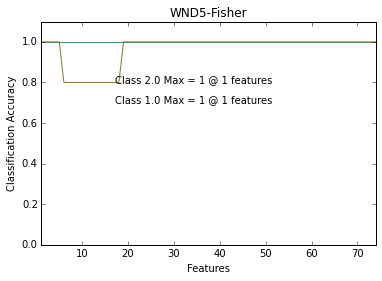

In [7]:
feat_range = range (1,75)
mean_feat_acc = ClsAcc_vs_N_features (WND5_Cls, Fisher, class_traits, class_vals, feat_range)
Graph_NFeat_vs_ClsAcc ('WND5-Fisher', feat_range, mean_feat_acc, class_vals)


Train class sizes : [4, 4]
N Features        : 1-199
Iterations        : 25
class_vals        : [2.0, 1.0]
Iteration 24; cumulative accuracies: [1.0, 1.0]
N features 199


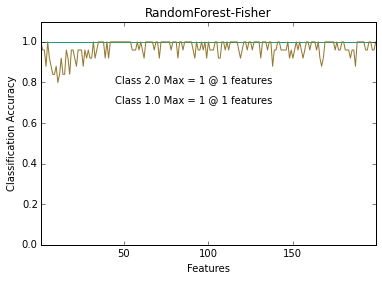

In [8]:
feat_range = range (1,200)
mean_feat_acc = ClsAcc_vs_N_features (rand_forest_clf, Fisher, class_traits, class_vals, feat_range)
Graph_NFeat_vs_ClsAcc ('RandomForest-Fisher', feat_range, mean_feat_acc, class_vals)


In [9]:
sorted_feature_names,sorted_feature_indexes,sorted_feature_means = Mean_Feat_weights (Fisher, class_traits, class_vals, np.array(cardio_feature_names))
for idx in range (len(sorted_feature_names)):
    print ('{:>45s} [{:3d}]: {:4g}'.format(sorted_feature_names[idx],sorted_feature_indexes[idx],sorted_feature_means[idx]))


Train class sizes : [4, 4]
Iterations        : 25
class_vals        : [2.0, 1.0]
Iteration 24
                     FormFactor_Two_Mode_Base [113]: 24.9639
                    Transfer_Magnitude_5_Base [498]: 23.9376
                      Transfer_Magnitude_5_Up [543]: 17.4729
                    Transfer_Magnitude_7_Peak [590]: 13.8751
                    Transfer_Magnitude_4_Base [497]: 13.3001
                      Transfer_Magnitude_4_Up [542]: 12.918
                        Transfer_Phase_1_Base [505]: 12.7553
                        Transfer_Phase_3_Base [507]: 12.5578
                    Transfer_Magnitude_6_Base [499]: 12.1958
                          FormFactor_Two_a_Up [280]: 12.0205
                  FormFactor_Two_Intercept_Up [278]: 11.7043
                    Transfer_Magnitude_4_Down [632]: 10.3307
                    Transfer_Magnitude_5_Down [633]: 9.39817
                       FormFactor_Two_Beta_Up [277]: 8.96389
                          FormFactor_Two_b_Up [281]: 

In [14]:
sorted_feature_names,sorted_feature_indexes,sorted_feature_means = Mean_Feat_weights (Pearson, class_traits, class_vals, np.array(cardio_feature_names))
for idx in range (len(sorted_feature_names)):
    print ('{:>45s} [{:3d}]: {:4g}'.format(sorted_feature_names[idx],sorted_feature_indexes[idx],sorted_feature_means[idx]))


Train class sizes : [4, 4]
Iterations        : 25
class_vals        : [2.0, 1.0]
Iteration 24
                    Transfer_Magnitude_5_Base [498]: 0.975956
         ReflectedWaveTransitTime_One_Beta_Up [217]: 0.968449
         ReflectedWaveTransitTime_Two_Beta_Up [307]: 0.968449
                      Transfer_Magnitude_5_Up [543]: 0.961928
                    Transfer_Magnitude_7_Peak [590]: 0.939337
            ReflectedWaveTransitTime_Two_b_Up [311]: 0.938099
            ReflectedWaveTransitTime_One_b_Up [221]: 0.938099
                    Transfer_Magnitude_4_Base [497]: 0.9346
                      Transfer_Magnitude_4_Up [542]: 0.927724
                    Transfer_Magnitude_4_Down [632]: 0.919337
                        Transfer_Phase_3_Base [507]: 0.918848
                    Transfer_Magnitude_5_Down [633]: 0.917324
                          FormFactor_Two_a_Up [280]: 0.915371
                  FormFactor_Two_Intercept_Up [278]: 0.913714
                        Transfer_Phase_1